In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv('./dataset/Bangalore_AQI_Dataset.csv')

In [5]:
df

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,Bangalore,01/01/18,68,37.40,73.44,56.44,77.52,0.71,64.60
1,Bangalore,02/01/18,76,41.80,82.08,63.08,86.64,0.80,72.20
2,Bangalore,03/01/18,70,38.50,75.60,58.10,79.80,0.74,66.50
3,Bangalore,04/01/18,78,42.90,84.24,64.74,88.92,0.82,74.10
4,Bangalore,05/01/18,82,45.10,88.56,68.06,93.48,0.86,77.90
...,...,...,...,...,...,...,...,...,...
2551,Bangalore,27/12/24,54,29.70,58.32,44.82,61.56,0.57,51.30
2552,Bangalore,28/12/24,57,31.35,61.56,47.31,64.98,0.60,54.15
2553,Bangalore,29/12/24,70,38.50,75.60,58.10,79.80,0.74,66.50
2554,Bangalore,30/12/24,62,34.10,66.96,51.46,70.68,0.65,58.90


In [9]:
# Define bins and labels
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

df['AQI_Bucket'] = pd.cut(df['AQI'], bins=bins, labels=labels)


In [11]:
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI_Bucket']  # or 'AQI' if you want regression


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune k
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test_scaled)


In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        89
    Moderate       1.00      1.00      1.00        71
        Poor       1.00      1.00      1.00         4
Satisfactory       1.00      1.00      1.00       348

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512


Confusion Matrix:
 [[ 89   0   0   0]
 [  0  71   0   0]
 [  0   0   4   0]
 [  0   0   0 348]]


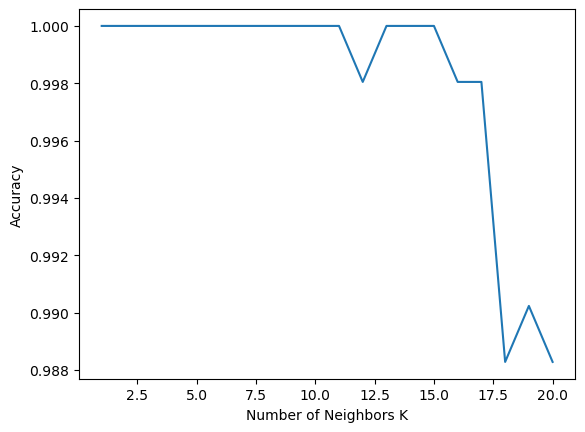

In [29]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
import matplotlib.pyplot as plt
plt.plot(range(1, 21), accuracies)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()
